<a href="https://colab.research.google.com/github/domdelvecchio/machine-learning-101/blob/main/binary%20classification/molecular-activity/molecular-activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.4.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [3]:
url = 'https://raw.githubusercontent.com/domdelvecchio/machine-learning-101/main/binary%20classification/molecular-activity/molecular_activity.csv'
dataset = pd.read_csv(url)
X = dataset.iloc[1:, :-1].values
X = np.asarray(X).astype(np.float32)
y = dataset.iloc[1:, -1].values
y=np.asarray(y).astype(np.float32)

In [4]:
print(X)
print(y)

[[ 3.63     65.62     52.68      5.44    ]
 [ 3.63     68.9      58.29      6.06    ]
 [ 4.11     75.59     62.81      6.44    ]
 ...
 [ 5.895225 53.324352 44.116573  4.418119]
 [ 5.88045  52.831657 44.165035  4.620044]
 [ 5.836125 52.694347 48.098534  4.418119]]
[1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 1. 1.

### Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 1)

## Part 2 - Building the ANN

### Initializing the ANN

In [32]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [33]:
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))

### Adding the second hidden layer

In [34]:
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

### Adding the output layer

In [35]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [36]:
ann.compile(optimizer = 'adam', loss = 'mse', metrics=['accuracy'])

### Training the ANN model on the Training set

In [37]:
history = ann.fit(X_train, y_train, epochs=100, batch_size=4, validation_data=(X_val, y_val), verbose=0)

## Plot Loss - training vs validation

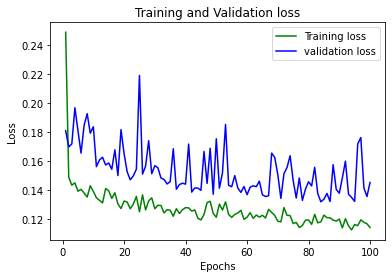

In [38]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,len(loss_val) + 1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Accuracy - training vs validation

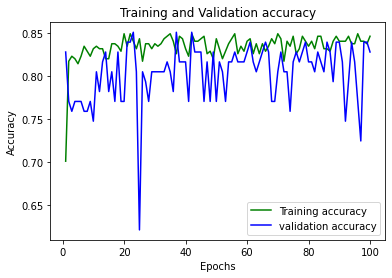

In [39]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,len(acc_val) + 1)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Predicting the results of the Test set

In [42]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
#print(np.concatenate(y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)))
print(np.around(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)).astype(int))

[[0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]]


# Make a prediction

In [48]:
# make a prediction
row = [3.15, 62.38, 58.02, 6.11]
yhat = ann.predict([row])
print('Predicted: %.3f' % yhat)

Predicted: 0.257
